# Precise Kernel - demo on UCI datasets

In [1]:
import process_results

2023-07-12 11:55:46.829870: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Locate to the directory of run_regression.py
%cd ../..

/Users/mattiarosso/Desktop/Eurecom/SemesterProject/Repository/Sparse-Gaussian-Processes-Revisited


In [3]:
!rm -rf results/run*
!python3 run_regression.py --dataset boston --iterations 1024 --num_posterior_samples 256 --n_layers 1 --precise_kernel 1 --kfold -1 --prior_precision_type laplace --prior_laplace_b 10


### Static Train/Test split ###
INFO:root:Loading dataset from ./data/boston.pth
INFO:root:Number of inducing points: 100
================= DGP
 Input dim = 13
 Output dim = 1
 Depth = 1
 |============ GP Layer 
 | Input dim = 13
 | Output dim = 1
 | Num inducing = 100
 | Prior on inducing positions = normal
 | |======= Kernel: FullPrecisionRBF (param: LLᵀ)
 | | Variance = 0.100
 | | Prior precision type = laplace (b = 10.00)
TRAIN | iter =      1      sample marginal LL = -3.19
TRAIN | iter =    251      sample marginal LL = -5.16
TRAIN | iter =    501      sample marginal LL = -5.26
TRAIN | iter =    751      sample marginal LL = -5.41
TRAIN | iter =   1001      sample marginal LL = -5.22
{'dataset': 'boston',
 'fold': 0,
 'minibatch_size': 404,
 'model': 'bsgp',
 'n_layers': 1,
 'num_inducing': 100,
 'precise_kernel': 1,
 'prior_type': 'normal',
 'test_mnll': 3.619819263978154}


In [4]:
precisions_merged, precisions_merged_mean, precisions_merged_var, posterior_samples_kerlogvar, test_mnll = process_results.process_results_onefold(filepath='results/run-0001/LRBF_results.json', precise_kernel=1, d=13)

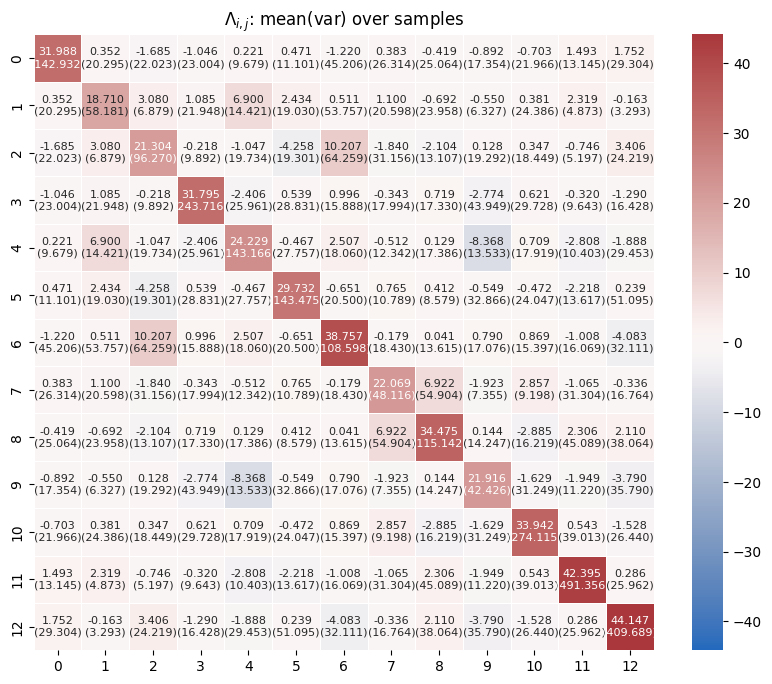

In [5]:
process_results.heatmap_precision(precisions_merged_mean, precisions_merged_var, fig_height=8, fig_width=10)

In [6]:
!rm -rf results/run*
!python3 run_regression.py --dataset yacht --iterations 1024 --num_posterior_samples 256 --n_layers 1 --precise_kernel 1 --kfold 3 --prior_precision_type laplace --prior_laplace_b 10

INFO:root:Loading dataset from ./data/yacht.pth

### Training fold: 1/3 ###
INFO:root:Number of inducing points: 100
================= DGP
 Input dim = 6
 Output dim = 1
 Depth = 1
 |============ GP Layer 
 | Input dim = 6
 | Output dim = 1
 | Num inducing = 100
 | Prior on inducing positions = normal
 | |======= Kernel: FullPrecisionRBF (param: LLᵀ)
 | | Variance = 0.100
 | | Prior precision type = laplace (b = 10.00)
TRAIN | iter =      1      sample marginal LL = -2.96
TRAIN | iter =    251      sample marginal LL = -3.15
TRAIN | iter =    501      sample marginal LL = -1.51
TRAIN | iter =    751      sample marginal LL = -0.42
TRAIN | iter =   1001      sample marginal LL = -0.04
Fold 0 - precise kernel: 1 - test MNLL: 0.419

### Training fold: 2/3 ###
INFO:root:Number of inducing points: 100
================= DGP
 Input dim = 6
 Output dim = 1
 Depth = 1
 |============ GP Layer 
 | Input dim = 6
 | Output dim = 1
 | Num inducing = 100
 | Prior on inducing positions = normal
 | |==

In [9]:
precisions_merged_kfold, precisions_merged_mean_kfold, precisions_mean_over_kfold, precisions_merged_var_kfold, precisions_var_over_kfold, posterior_samples_kerlogvar_kfold, test_mnll_kfold = process_results.process_results_kfold(filepath='results/run-0001/LRBF_results.json', kfold=3, precise_kernel=1, invsquare=False, d=6)

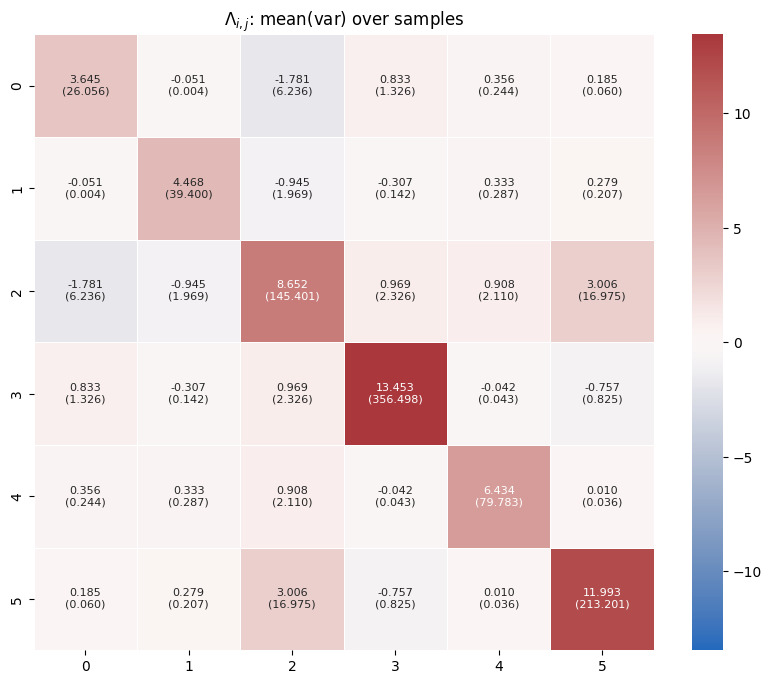

In [11]:
process_results.heatmap_precision(precisions_mean_over_kfold, precisions_var_over_kfold, fig_height=8, fig_width=10)